In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Cleaning text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("20191226-reviews.csv")

reviews['body'][0]
type(reviews)

pandas.core.frame.DataFrame

In [3]:
# 0.4 Link review data to item data bsed on common column "asin"
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")
reviews.head()
print(reviews['brand'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
67981       Sony
67982       Sony
67983       Sony
67984      Apple
67985    Samsung
Name: brand, Length: 67986, dtype: object


In [4]:
# 0.5 Rename columns
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating", "body": "Review"}, inplace=True)
#reviews["id"] = reviews.index + 1
reviews.head(15)

,asin,name,rating,date,verified,title,Review,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0


In [5]:
samsung = reviews[reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)


In [6]:
samsung.dropna(inplace=True)
samsung[reviews['rating'] != 3]
samsung['Positivity'] = np.where(samsung['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating', 'date', 'verified', 'title', 'helpfulVotes', 'brand', 'item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
samsung.drop(cols, axis=1, inplace=True)
samsung.head()

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Review,Positivity
60925,I bought this phone because i needed a phone t...,0
58860,Works like new.,1
62388,I was torn between getting an S8 used or a Not...,1
49121,The box came with the phone and a charger. I w...,1
65704,Overall the phone is great. It came in with Sp...,1


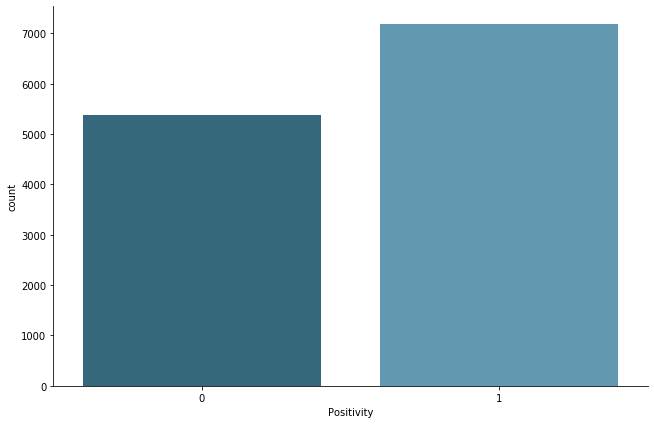

In [7]:
sns.catplot(x="Positivity", data=samsung, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [8]:
samsung = samsung.dropna(how='any',axis=0)
# 0.5 Rename columns
samsung.rename(columns={"body": "Review"}, inplace=True)
samsung.to_csv (r'samsung_new.csv', index = False, header=True)
df_samsung = pd.read_csv("samsung_new.csv")
print(df_samsung)

                                                  Review  Positivity
0      I bought this phone because i needed a phone t...           0
1                                        Works like new.           1
2      I was torn between getting an S8 used or a Not...           1
3      The box came with the phone and a charger. I w...           1
4      Overall the phone is great. It came in with Sp...           1
...                                                  ...         ...
12556  Exactly as promised. Was worried I wouldn't be...           1
12557  Great phone, bought it to replace my galaxy no...           1
12558  TOP DOG! IMO, best phone out there. Great for ...           1
12559  I bought two of these from Amazon. I am curren...           1
12560  After recently becoming one of America's newes...           1

[12561 rows x 2 columns]


# Cleaning data

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = samsung["Review"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
 # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

[nltk_data] Downloading package wordnet to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# 1.2 Apply preprocess function to the dataframe
samsung["Review"] = samsung["Review"].astype("str")
samsung["clean_text"] = samsung["Review"].apply(clean_text)







In [11]:






# Re-order Columns
samsung = samsung[['clean_text','Positivity']]

samsung.to_cs.tov (r'samsung_s.csv', index = False, header=True)
df_samsungs = pd.read_csv("samsung_s.csv")

df_samsungs

,clean_text,Positivity
0,bought needed would everything wanted really w...,0
1,work new,1
2,torn getting s8 used note 8 went a50 instead i...,1
3,box came charger expecting earphone included f...,1
4,overall came spanish text 60 battery nothing f...,1
...,...,...
12556,exactly promised worried able activate america...,1
12557,bought replace galaxy note got coffee rugged a...,1
12558,top dog imo multitasking screen fast lightweig...,1
12559,bought two amazon currently using one solid co...,1


In [12]:
# 0.5 Rename columns
df_samsungs.rename(columns={"clean_text": "Review"}, inplace=True)

In [13]:
df_samsungs["Review"] = df_samsungs["Review"].astype("str")

In [14]:
# Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

In [15]:
# 2.3 Initializer
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

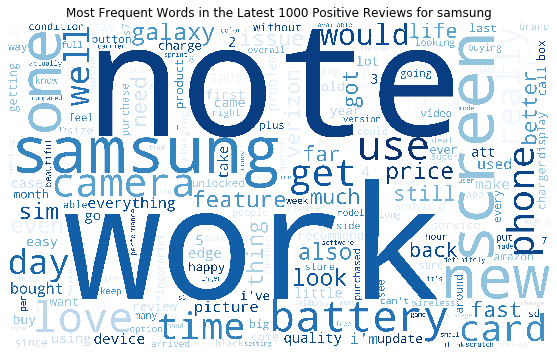

In [16]:
# 2.4 Plot wordclouds for latest 1000 reviews for Apple
samsung_pos = " ".join(samsung[samsung["Positivity"]==1]["clean_text"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for samsung")

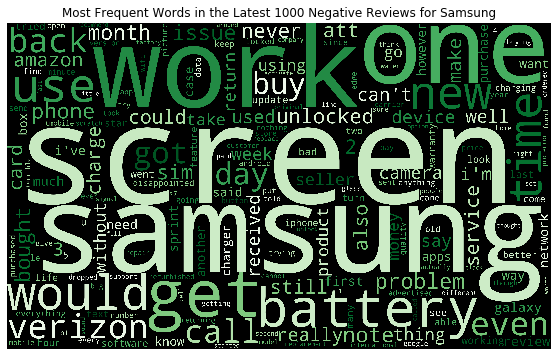

In [17]:
samsung_neg = " ".join(samsung[samsung["Positivity"]==0]["clean_text"][0:1000])
samsung_neg_word_freq = word_freq_dict(samsung_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="black")
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

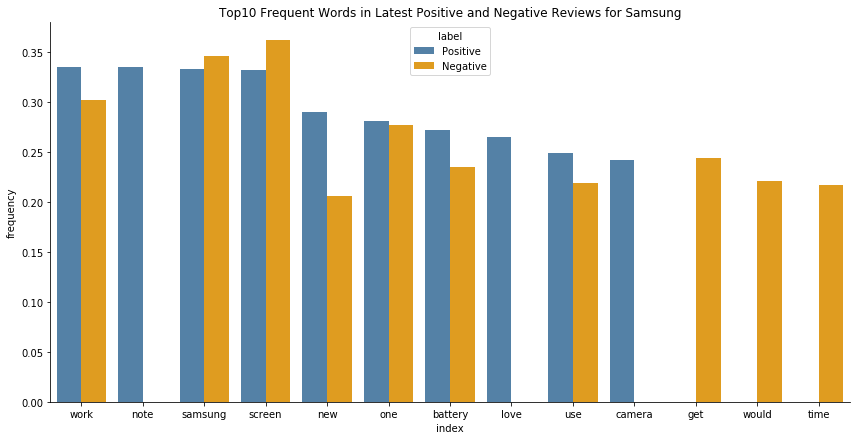

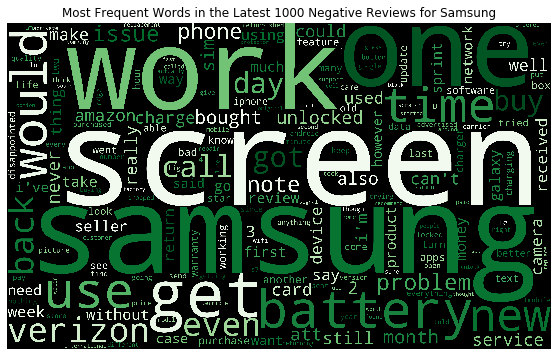

In [18]:
topn_wordfreq_bar_both(samsung_pos_word_freq, samsung_neg_word_freq, 
                       min(sum(samsung["Positivity"]==1), 1000), 
                       min(sum(samsung["Positivity"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Samsung", 
                       ["steelblue", "orange"], 
                       height=6, aspect=2)
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

In [19]:
corpus = []
for i in range(0,12561):
    review = re.sub('[^a-zA-Z]', ' ',df_samsungs['Review'][i])
    review = review.lower()
    corpus.append(review)

In [20]:
corpus

['bought needed would everything wanted really well fast camera quality superb need extra going however want able call text cant software unlocked locked cant put service provider without going samsung unlock going provider haveing update term quality two star think false listing part seller',
 'work new',
 'torn getting s  used note   went a   instead i m extremely happy capability choice     hand',
 'box came charger expecting earphone included fingerprint scanner little particularyou place finger certain way responds still functional though far battery life disappointing last   hrsi expecting little longer',
 'overall came spanish text    battery nothing factory reset fix regardless customization fantastic teardrop notch go setting display fullscreen apps advance replace bar zoomed adjust zoom font style fingerprint face recognition also fantastic battery life ridiculous go school    hour travel train   casual use struggle get    incredible battery life real problem watching full sc

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df_samsungs.iloc[:,1] 

In [22]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 801  303]
 [ 261 1148]]


In [23]:
(801 + 1148)/2512.2

0.7758140275455776

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 898  206]
 [ 261 1148]]


In [41]:
(898 + 1148)/2512.2

0.8144256030570814

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8141663350577
Precision: 0.8478581979320532
Recall: 0.8147622427253371


Text(0.5, 257.44, 'Predicted label')

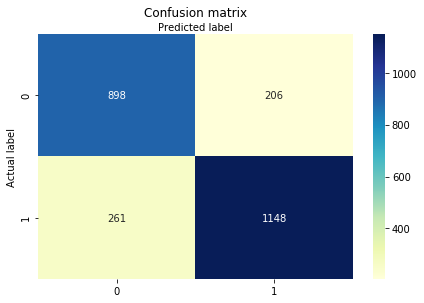

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 850  254]
 [ 245 1164]]


In [36]:
(850 + 1164)/2512.2

0.8016877637130803

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8014325507361719
Precision: 0.8208744710860366
Recall: 0.8261178140525195


Text(0.5, 257.44, 'Predicted label')

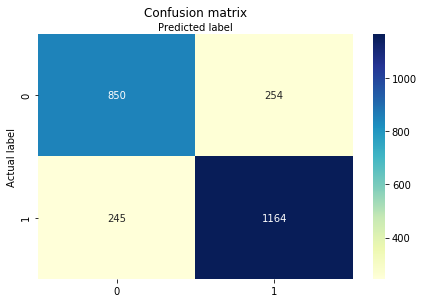

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')